# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#Exporting the City list to a csv file.
Cities_df = pd.DataFrame(cities)
Cities_df.to_csv("../output_data/City_list.csv",index_label="City_ID")


Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | egvekinot
Processing Record 2 of Set 1 | bairiki
Processing Record 3 of Set 1 | bambanglipuro
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | den helder
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | tuatapere
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | abay
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | mouzakion
City not found. Skipping...
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | blythe
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | grand river south east
City not

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,egvekinot,66.3167,-179.1667,-26.80,87,100,3.90,RU,1675727310
1,bairiki,1.3292,172.9752,30.00,66,75,5.66,KI,1675727310
2,bambanglipuro,-7.9500,110.2833,24.07,93,100,1.89,ID,1675727311
3,yellowknife,62.4560,-114.3525,-20.71,77,75,3.60,CA,1675727201
4,saskylakh,71.9167,114.0833,-35.86,100,97,1.10,RU,1675727311


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egvekinot,66.3167,-179.1667,-26.80,87,100,3.90,RU,1675727310
1,bairiki,1.3292,172.9752,30.00,66,75,5.66,KI,1675727310
2,bambanglipuro,-7.9500,110.2833,24.07,93,100,1.89,ID,1675727311
3,yellowknife,62.4560,-114.3525,-20.71,77,75,3.60,CA,1675727201
4,saskylakh,71.9167,114.0833,-35.86,100,97,1.10,RU,1675727311


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

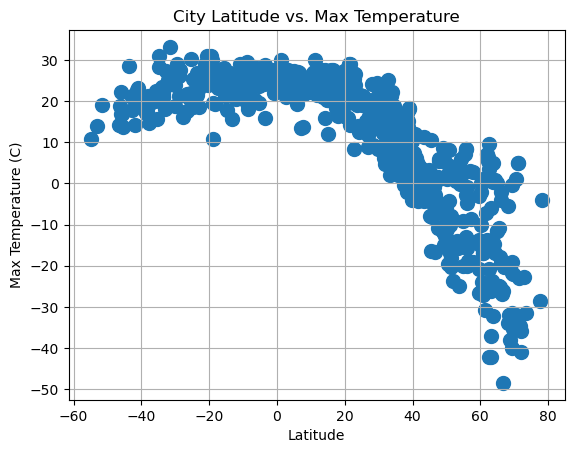

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],alpha=1,marker="o",s=100)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

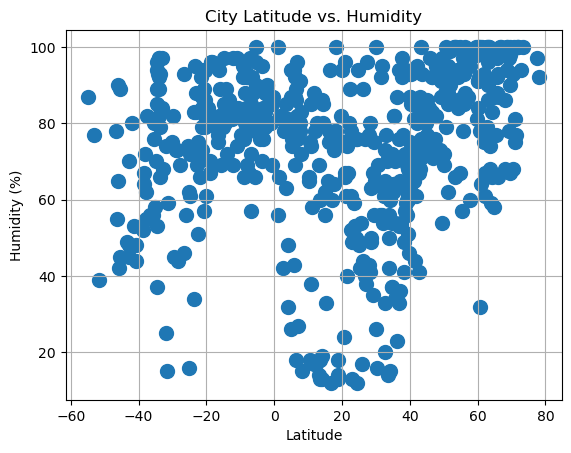

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],alpha=1,marker="o",s=100)

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

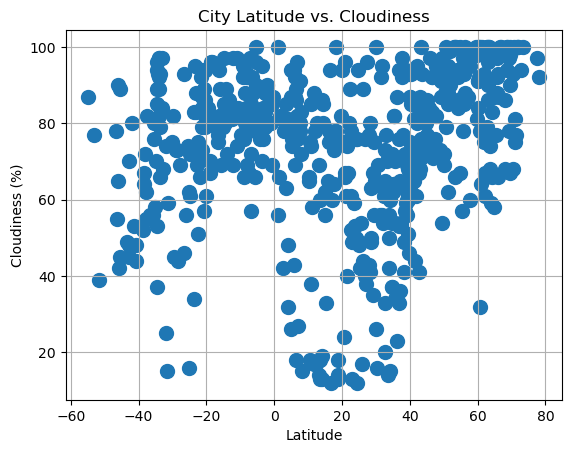

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],alpha=1,marker="o",s=100)

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

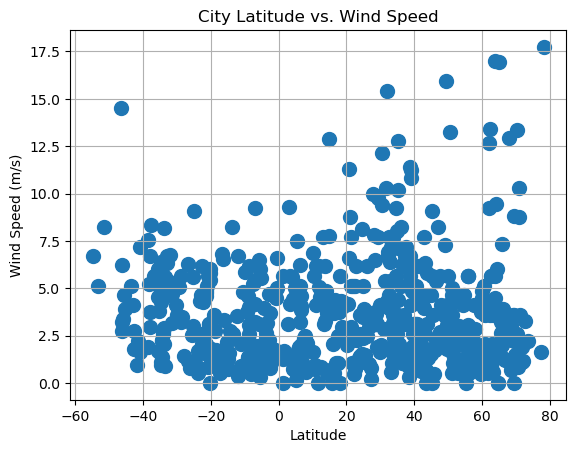

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],alpha=1,marker="o",s=100)

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def Linear_Regression_Plots(x,y,xlabel,ylabel, title):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regression_values = x*slope + intercept
    Regression_equation = "y = "+str(round(slope,2))+"x + " + str(round(intercept,2))
    rsquared = round(rvalue**2,3)

    plt.scatter(x,y,alpha=1)
    plt.plot(x,regression_values,color="red")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.annotate(Regression_equation,(x.mean(),y.min()),fontsize = 10,color="red")
    print(f"The r-squared is: {rsquared}")
    plt.show()


In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egvekinot,66.3167,-179.1667,-26.80,87,100,3.90,RU,1675727310
1,bairiki,1.3292,172.9752,30.00,66,75,5.66,KI,1675727310
3,yellowknife,62.4560,-114.3525,-20.71,77,75,3.60,CA,1675727201
4,saskylakh,71.9167,114.0833,-35.86,100,97,1.10,RU,1675727311
6,kapaa,22.0752,-159.3190,27.18,80,40,5.14,US,1675727312


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bambanglipuro,-7.9500,110.2833,24.07,93,100,1.89,ID,1675727311
5,port alfred,-33.5906,26.8910,21.77,93,100,0.89,ZA,1675727312
10,tuatapere,-46.1333,167.6833,16.83,65,86,6.23,NZ,1675727314
13,puerto ayora,-0.7393,-90.3518,27.53,85,52,4.47,EC,1675727226
15,busselton,-33.6500,115.3333,20.98,66,99,5.59,AU,1675727315


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.746


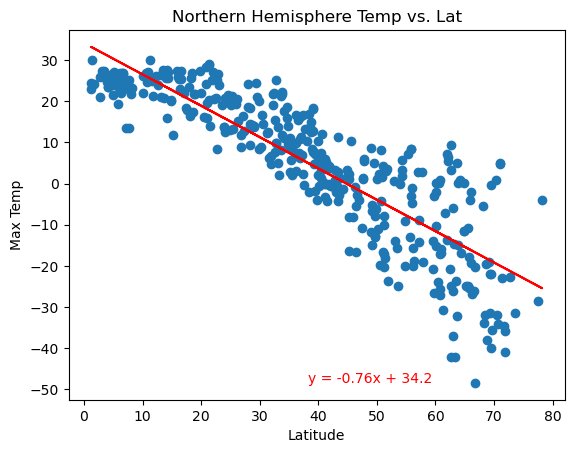

In [63]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

Linear_Regression_Plots(x_axis,y_axis,"Latitude","Max Temp","Northern Hemisphere Temp vs. Lat")

The r-squared is: 0.232


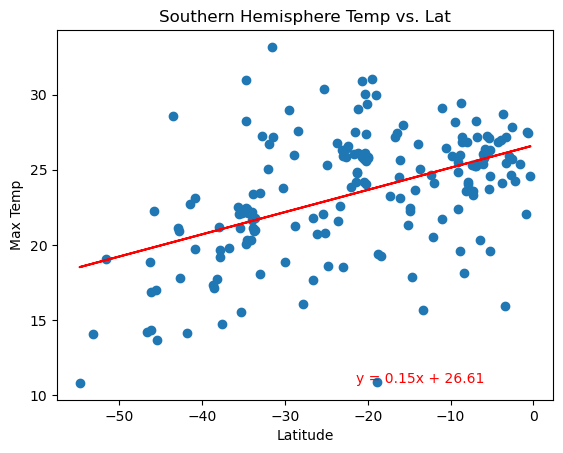

In [64]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

Linear_Regression_Plots(x_axis,y_axis,"Latitude","Max Temp","Southern Hemisphere Temp vs. Lat")

**Discussion about the linear relationship:** 
In both graphs, we see as the max temperature increases as we approach the equator, or a latitude of 0. In the Northern Hemisphere regression we see with each increase in Latitude of 1, we estimate the max temp decreases by 0.76 degrees. Similarly in the Southern Hemisphere, as we move closer to the equator by an additional latitude of 1, the max temperature increases by 0.15 degrees. We can also see the Northern Hemisphere regression has more statistical significance given the larger R-Squared and illustrated by the data points all being concentrated closeer to the regression line than in the Southern Hemisphere regression.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.191


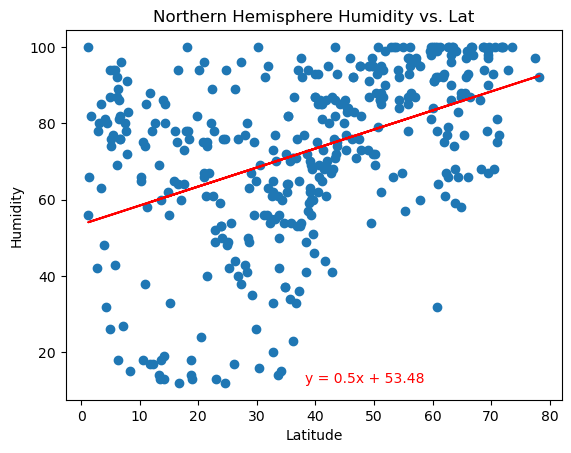

In [65]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

Linear_Regression_Plots(x_axis,y_axis,"Latitude","Humidity","Northern Hemisphere Humidity vs. Lat")

The r-squared is: 0.155


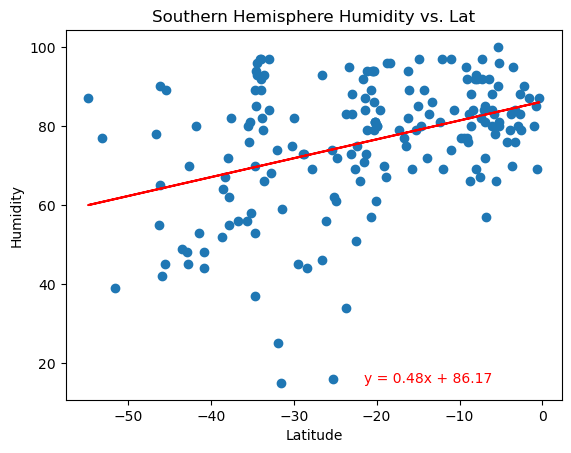

In [72]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

Linear_Regression_Plots(x_axis,y_axis,"Latitude","Humidity","Southern Hemisphere Humidity vs. Lat")

**Discussion about the linear relationship:** 
The analysis shows that humidity increases, the further north. Both regressions have weak linear relationships with R-squared below 0.2 in both charts. This is evident from the many outliers shown far from the regression line and no clear trend in the scatter plot.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.067


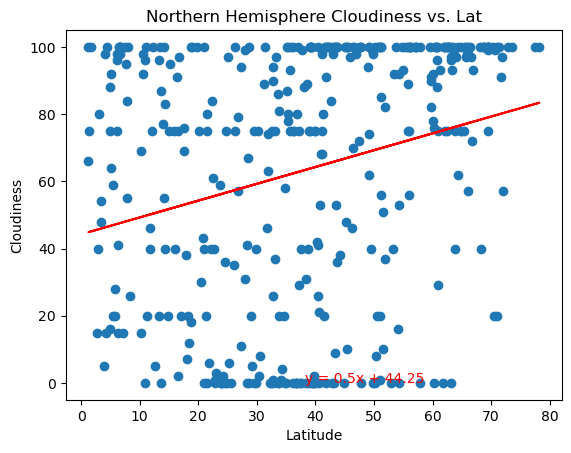

In [66]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

Linear_Regression_Plots(x_axis,y_axis,"Latitude","Cloudiness","Northern Hemisphere Cloudiness vs. Lat")

The r-squared is: 0.152


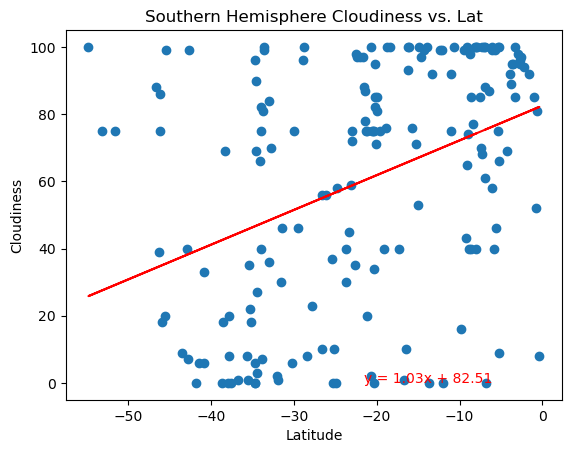

In [67]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

Linear_Regression_Plots(x_axis,y_axis,"Latitude","Cloudiness","Southern Hemisphere Cloudiness vs. Lat")

**Discussion about the linear relationship:** 
Similar to the humidity analysis, there is a weak linear relationship between cloudiness and latitude. In both regressions, there is a positive correlation between cloudiness and latitude indicating increased cloudiness as you move further north, but the low R-squareds provide little statistical support of such findings.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001


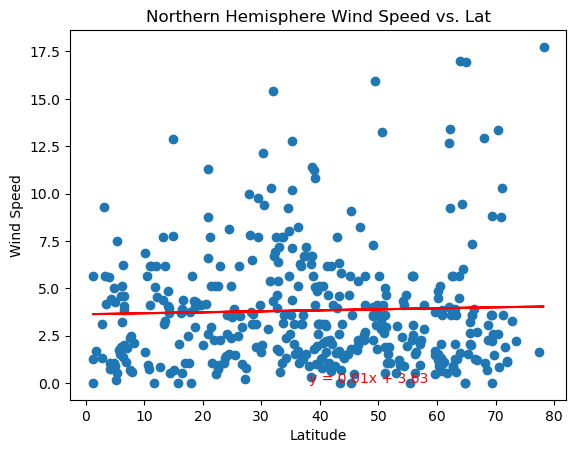

In [68]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]

Linear_Regression_Plots(x_axis,y_axis,"Latitude","Wind Speed","Northern Hemisphere Wind Speed vs. Lat")

The r-squared is: 0.088


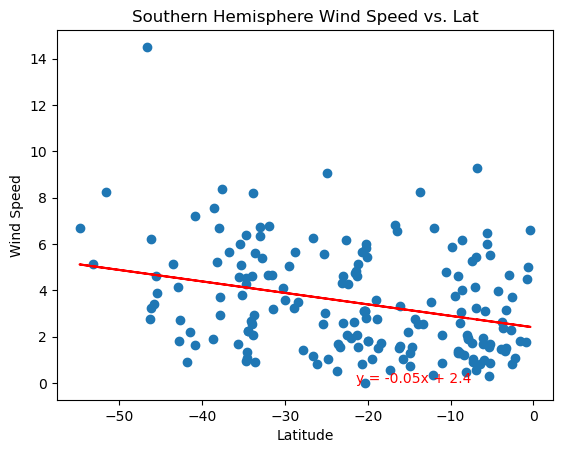

In [71]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

Linear_Regression_Plots(x_axis,y_axis,"Latitude","Wind Speed","Southern Hemisphere Wind Speed vs. Lat")

**Discussion about the linear relationship:**
Similar to the humidity and cloudiness analysis, there is a weak linear relationship between wind speeds and latitude. With R-squareds of 0.001 and 0.088, there is no correlation between wind speeds and latitude. Typically wind speeds are effected by elevation and proximity to the ocean, and not latitude.